# Generador F de Fisher

Si tenemos que $U\sim\chi^2_{(m)}$ y $V\sim\chi^2_{(n)}$ tenemos que $$\frac{U/m}{V/n}\sim F(m,n)$$ 
Usaremos este hecho para simularlas.

In [1]:
import numpy as np
import seaborn as sns
from scipy.special import gamma
sns.set_theme()

In [2]:
def F(m:int,n:int) -> float:
    U = np.random.chisquare(m)
    V = np.random.chisquare(n)
    F = (U/m) / (V/n)
    return F

def density_f(x:float, m:int,n:int) -> float:
    numerador_factor_1 = gamma((m+n)/2)
    denominador_factor_1 = gamma(m/2) * gamma(n/2)
    factor_1 = numerador_factor_1/denominador_factor_1
    factor_2 = (m/n) ** (m/2)
    factor = factor_1 * factor_2   
    var_x_numerador = x ** ((m-2)/2)
    var_x_denominador = (1+(m*x)/n) ** ((m+n)/2)
    var_x = var_x_numerador / var_x_denominador
    resultado = factor * var_x
    return resultado

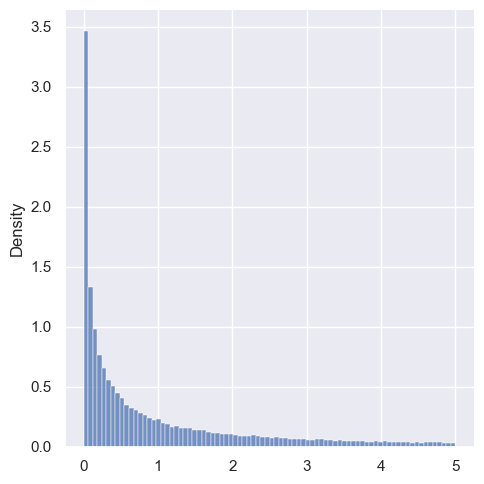

In [3]:
m = 1
n = 1
cantidad = 100000
muestra = [a for i in range(cantidad) if (a := F(m,n)) <= 5]
sns.displot(data=muestra, stat="density")# ,kde=True

Comparando la muestra con la función de densidad.

<Axes: ylabel='Density'>

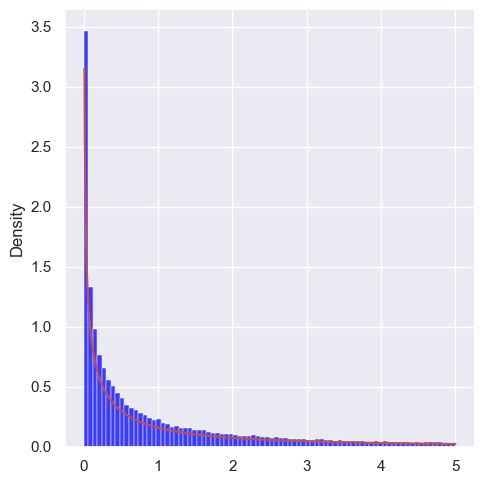

In [4]:
X = np.linspace(0.01,5,1000)
Y = density_f(X,m,n)
sns.displot(data=muestra, stat="density", color='blue')# ,kde=True
sns.lineplot(x=X,y=Y,color='r')